<a href="https://colab.research.google.com/github/SarmadSaleeem/Phishing_Website_Detection/blob/main/Phishing_website_Detection_(Dataset_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Some Info about dataset

#Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

## Display All Columns and Rows in Colab

In [ ]:
pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns

#Uploading Dataset


In [ ]:
dataset = pd.read_csv("drive/MyDrive/Datasets/dataset_phishing_1.csv")

#Dataset Information


##First Five Rows


In [ ]:
first_five_rows = dataset.head()
first_five_rows

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,legitimate


##Last Five Rows

In [ ]:
last_five_rows = dataset.tail()
last_five_rows

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,1,0,4,4,3,3,8,11,9,11,7.750000,6.00,9.500000,0,0,0,0,0,0,199,0.884422,0.115578,0,0,0,0.043478,0,0.173913,0,1,80.000000,0,21.052632,78.947368,0,0,0,0.000000,0,0,0,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,1,0,0,1,5,0,1,0,0,0,1,1,1,0,0,1,0.023810,0.000000,0,0,1,0,0,3,0,0,0,0,1,0,12,3,3,3,3,10,10,8,5.166667,6.50,4.900000,0,0,0,0,0,0,3,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,0.000000,0,0,0,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,1,1,0,0,5,0,1,0,0,0,0,1,0,0,0,0,0.142857,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,13,5,1,3,1,15,8,15,6.153846,5.50,6.272727,0,1,0,0,0,0,68,0.470588,0.529412,0,5,0,0.000000,0,0.000000,0,1,6.250000,0,0.000000,0.000000,0,0,0,80.000000,0,0,0,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.000000,0,0,0,0,0,2,0,0,0,0,0,0,2,3,3,3,0,22,22,0,12.500000,12.50,0.000000,0,0,0,0,0,0,32,0.375000,0.625000,0,1,0,0.050000,0,0.050000,0,1,16.666667,0,0.000000,100.000000,0,0,0,0.000000,0,0,0,1,0,0,85,2836,2455493,0,0,4,legitimate
11429,http://174.139.46.123/ap/signin?openid.pape.ma...,477,14,1,24,0,1,1,9,0,9,18,0,23,4,0,1,0,9,0,0,1,0,0,4,1,0.085954,0.785714,0,0,1,1,1,3,0,0,0,0,1,1,90,8,1,2,1,12,3,12,4.377778,2.75,4.453488,3,0,0,1,0,2,21,0.428571,0.571429,0,3,0,0.000000,0,0.083333,1,1,0.000000,0,0.000000,0.000000,0,0,0,33.333333,0,0,0,1,1,1,0,-1,0,1,1,0,phishing


## Columns of the dataset

In [ ]:
columns = dataset.columns
columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

## DataTypes

In [ ]:
data_types = dataset.dtypes
data_types

,0
url,object
length_url,int64
length_hostname,int64
ip,int64
nb_dots,int64
nb_hyphens,int64
nb_at,int64
nb_qm,int64
nb_and,int64
nb_or,int64


## Statistical Properties

In [ ]:
statistical_summary = dataset.describe()
statistical_summary

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.00000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,0.322660,0.006649,0.123097,4.289589,0.000700,1.027909,0.004024,0.062292,0.001925,0.034821,0.448469,0.127997,0.006562,0.016710,0.610936,0.053137,0.025024,0.000350,0.002362,0.065617,0.050131,0.021610,2.231671,0.202450,0.083290,0.123447,0.000175,0.498250,0.003150,6.232808,2.927472,3.127297,5.019773,2.398950,15.393876,10.467979,10.561505,7.258882,7.678075,5.092425,0.327734,0.104199,0.004112,0.004899,0.017935,0.059755,87.189764,0.602457,0.276720,0.0,0.784864,0.0,0.158926,0.0,0.062469,0.063605,0.442170,51.978211,0.0,42.870444,23.236293,0.0,0.001312,0.006037,37.063922,0.001137,0.00140,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,1.093336,0.081274,1.466450,1.882251,0.026448,0.240325,0.103240,0.598190,0.077111,0.375576,0.501912,0.379008,0.080742,0.169358,0.487559,0.089363,0.093422,0.018705,0.048547,0.247622,0.218225,0.145412,0.637069,0.401843,0.276332,0.328964,0.013227,0.691907,0.056035,5.572355,4.768936,2.211571,3.941580,2.997809,22.083644,4.932015,23.077883,4.145827,3.578435,7.147050,0.842600,0.305533,0.063996,0.069827,0.132722,0.331266,166.758254,0.376474,0.319958,0.0,2.758802,0.0,0.266437,0.0,0.156209,0.244058,0.496666,41.523144,0.0,46.249897,38.386577,0.0,0.036204,0.077465,39.073385,0.033707,0.03739,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000

## Number of Legitmate vs Phishing Websites

In [ ]:
dataset['status'].value_counts()

,count
status,
legitimate,5715
phishing,5715


#Data Pre-Processing

## Check For Missing Values


In [ ]:
missing_values = dataset.isnull().sum()
missing_values

,0
url,0
length_url,0
length_hostname,0
ip,0
nb_dots,0
nb_hyphens,0
nb_at,0
nb_qm,0
nb_and,0
nb_or,0


## Changing OutPut to integar values 0 => legitmate, 1 => Phishing

In [ ]:
mapping = {'legitimate': 0, 'phishing': 1}
dataset['status'] = dataset['status'].map(mapping)

## Checking any negative values

In [ ]:
numeric_columns = dataset.select_dtypes(include=['float64', 'int64'])

# Check which numeric columns contain negative values
negative_columns = (numeric_columns < 0).sum()
negative_columns

# Display columns that have negative values
columns_with_negatives = negative_columns[negative_columns > 0]
print(columns_with_negatives)

domain_registration_length      46
domain_age                    1837
dtype: int64


## Remove negative Values

In [ ]:
## Because These negative values does not make any sense so it might me missing values
## To Handle these we will fill these values with the median

dataset['domain_registration_length'] = dataset['domain_registration_length'].mask(dataset['domain_registration_length'] < 0, dataset['domain_registration_length'].median())
dataset['domain_age'] = dataset['domain_age'].mask(dataset['domain_age'] < 0, dataset['domain_age'].median())

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

## Remove URl column

In [ ]:
## Because this is not necessory for modeling

dataset = dataset.drop('url', axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

## Corelation Matrix

In [ ]:
correlation_matrix = dataset.corr()
correlation_matrix

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,0.429044,0.023000,0.252188,0.484768,0.029853,0.252710,0.026088,0.313872,0.075620,0.102016,-0.073490,0.338344,0.160274,0.324225,-0.002235,0.446116,0.080929,0.010616,0.003441,0.197348,0.177240,0.062837,0.282909,0.174844,-0.041855,-0.000528,8.070526e-04,0.007605,0.076705,0.794710,0.515108,-0.239337,0.041109,0.040323,0.634467,0.115258,0.680274,0.399885,0.093460,0.494144,0.323579,-0.046459,0.067550,0.197618,-0.023522,0.085220,-0.099016,-0.010891,-0.003307,NaN,-0.019757,NaN,-0.095461,NaN,0.006765,0.014904,-0.076082,-0.012943,NaN,-0.008476,-0.038387,NaN,-0.009960,-0.008145,0.020460,0.007387,-0.012231,0.041879,0.125159,-0.006476,-0.007082,0.002512,-0.027526,0.072205,0.023357,0.236395,-0.102582,2.485805e-01
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,0.080657,-0.012073,-0.020352,-0.061848,-0.001450,0.031019,0.018075,-0.016535,-0.005052,-0.008040,-0.127428,0.286139,-0.035070,-0.046416,0.018975,0.170830,0.102523,-0.001459,-0.003083,-0.035630,0.401657,0.048557,0.313370,0.133184,-0.137264,0.178597,-4.407309e-03,-0.042713,-0.040025,0.140875,0.058970,0.018724,-0.013812,-0.039347,0.123400,0.614693,0.038887,0.213978,0.355857,0.019688,-0.020275,-0.003761,0.183160,-0.027911,-0.025601,0.055470,-0.104196,0.000411,0.020493,NaN,-0.024264,NaN,-0.070436,NaN,-0.047939,-0.009469,-0.044190,-0.017908,NaN,-0.022768,-0.009521,NaN,-0.000752,-0.027693,0.110575,0.011038,-0.001399,-0.015054,0.217284,0.074707,-0.097794,-0.041559,-0.062438,0.163238,-0.023344,0.213990,-0.159342,2.383224e-01
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,0.197964,-0.001334,0.064421,0.235987,0.035109,0.053921,0.061787,0.201544,0.037081,0.018287,-0.137853,0.251561,0.059714,0.104357,0.017853,0.768906,0.290692,0.005202,-0.005369,0.115667,0.444759,0.216715,0.222845,0.156821,0.003239,-0.027109,1.292588e-02,0.012910,0.129143,0.403447,0.283681,-0.177556,-0.000995,0.058628,0.269258,0.071906,0.322605,0.189596,0.036529,0.266195,0.134423,-0.070726,0.041758,0.082574,-0.016344,0.166287,-0.096277,0.037867,-0.066779,NaN,-0.009999,NaN,-0.099793,NaN,-0.034636,0.013569,-0.119684,0.048502,NaN,0.027050,-0.068726,NaN,-0.001747,-0.017020,0.117002,0.014825,-0.015763,0.037971,0.137716,0.014561,0.053246,-0.108923,-0.084314,0.167930,0.127823,0.270743,-0.218968,3.216978e-01
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,0.329238,0.032589,0.099476,0.241632,-0.004459,0.225311,0.047574,0.254877,0.050057,0.037872,0.067286,0.340072,0.236517,0.454962,0.041915,0.222520,0.241359,0.000263,-0.021028,0.212686,0.294933,0.168367,0.684461,0.049843,-0.004549,0.078580,5.015362e-03,-0.056954,0.234492,0.589768,0.209441,-0.260

## Remove Non Varying columns

In [ ]:
non_varying_columns = dataset.columns[dataset.nunique() == 1]
non_varying_columns

dataset = dataset.drop(non_varying_columns, axis=1)

## Remove Highly Correlated features

In [ ]:
correlation_matrix_cleaned = dataset.corr()
correlation_threshold = 0.8

high_correlation_pairs = correlation_matrix_cleaned.abs().unstack().sort_values(kind="quicksort", ascending=False)

high_correlation_pairs = high_correlation_pairs[high_correlation_pairs > correlation_threshold]
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs.index.get_level_values(0) != high_correlation_pairs.index.get_level_values(1)]

columns_to_drop = set()
for (feature1, feature2) in high_correlation_pairs.index:
    if feature1 not in columns_to_drop and feature2 not in columns_to_drop:
        columns_to_drop.add(feature2)

dataset = dataset.drop(columns=columns_to_drop)

In [ ]:
dataset.to_csv('cleaned_dataset.csv', index=False)
from google.colab import files
files.download('cleaned_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Visualizations

## Correlation Heatmap

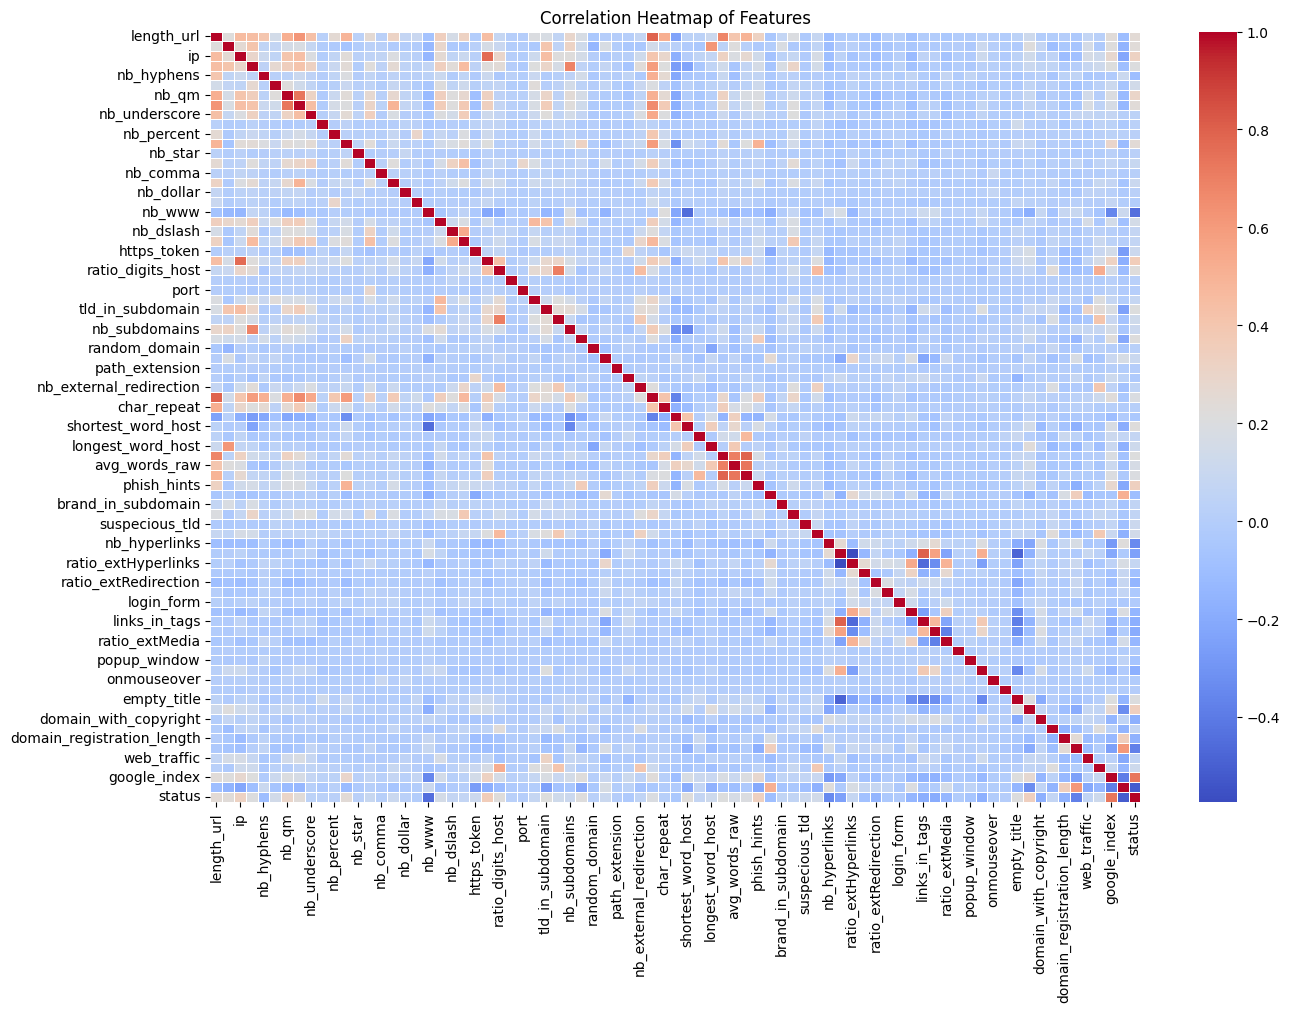

In [ ]:
plt.figure(figsize=(15, 10))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

## Bar Plot of Top 10 Correlated Features with the Target Variable

<ipython-input-150-6e99bc811ef4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlated_features.values, y=top_correlated_features.index, palette="vlag")


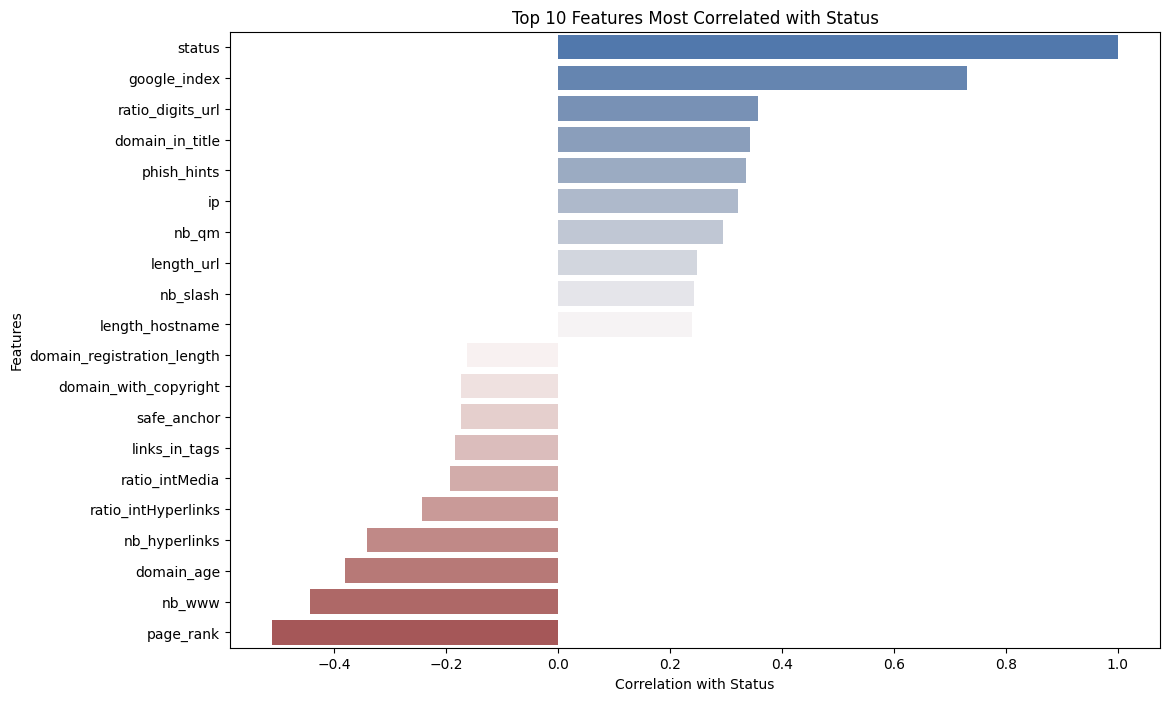

In [ ]:
correlations_with_status = corr_matrix['status'].sort_values(ascending=False)

# Display the top and bottom correlations
top_10_correlated = correlations_with_status.head(10)
bottom_10_correlated = correlations_with_status.tail(10)

# Combine the top and bottom correlations
top_correlated_features = pd.concat([top_10_correlated, bottom_10_correlated])

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_correlated_features.values, y=top_correlated_features.index, palette="vlag")
plt.title('Top 10 Features Most Correlated with Status')
plt.xlabel('Correlation with Status')
plt.ylabel('Features')
plt.show()

## Pie Chart of Target *Variable*

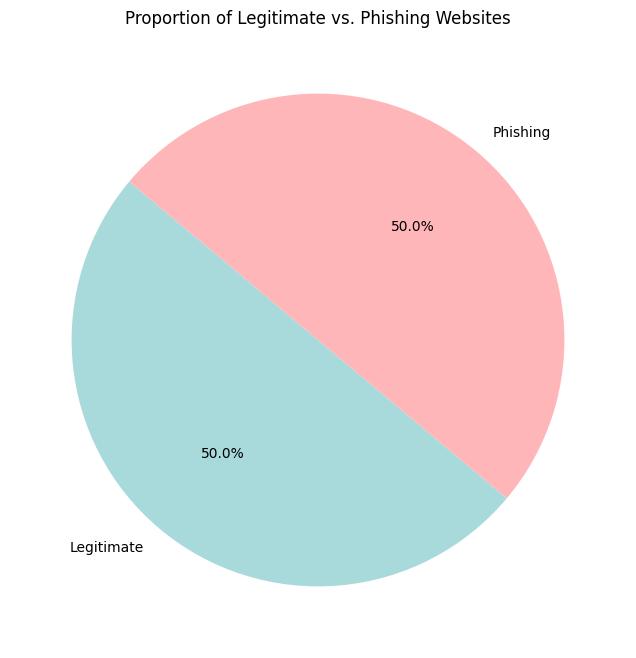

In [ ]:
# Calculate the proportion of each class
status_counts = dataset['status'].value_counts()
labels = ['Legitimate', 'Phishing']
colors = ['#A8DADC', '#FFB6B9']
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Legitimate vs. Phishing Websites')
plt.show()

## Histogram for the distribution of URL Lengths



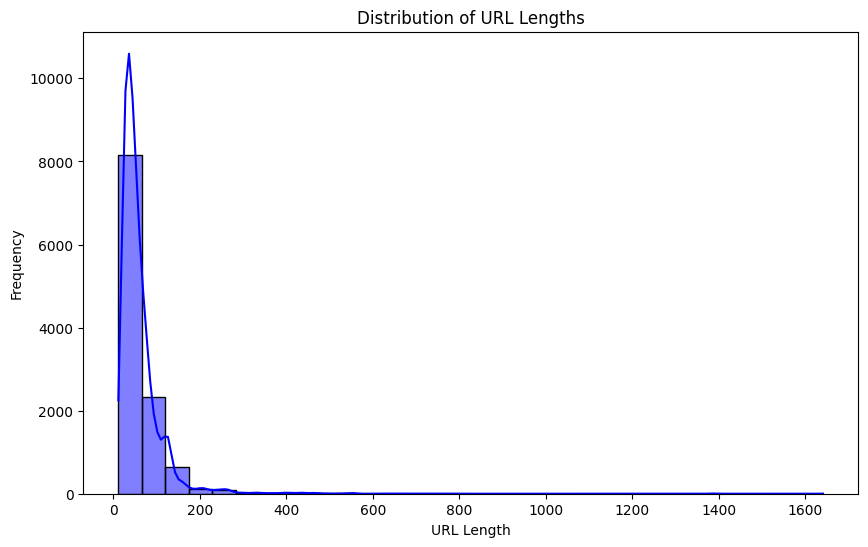

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['length_url'], kde=True, bins=30, color='blue')
plt.title('Distribution of URL Lengths')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.show()


## Pair Plot

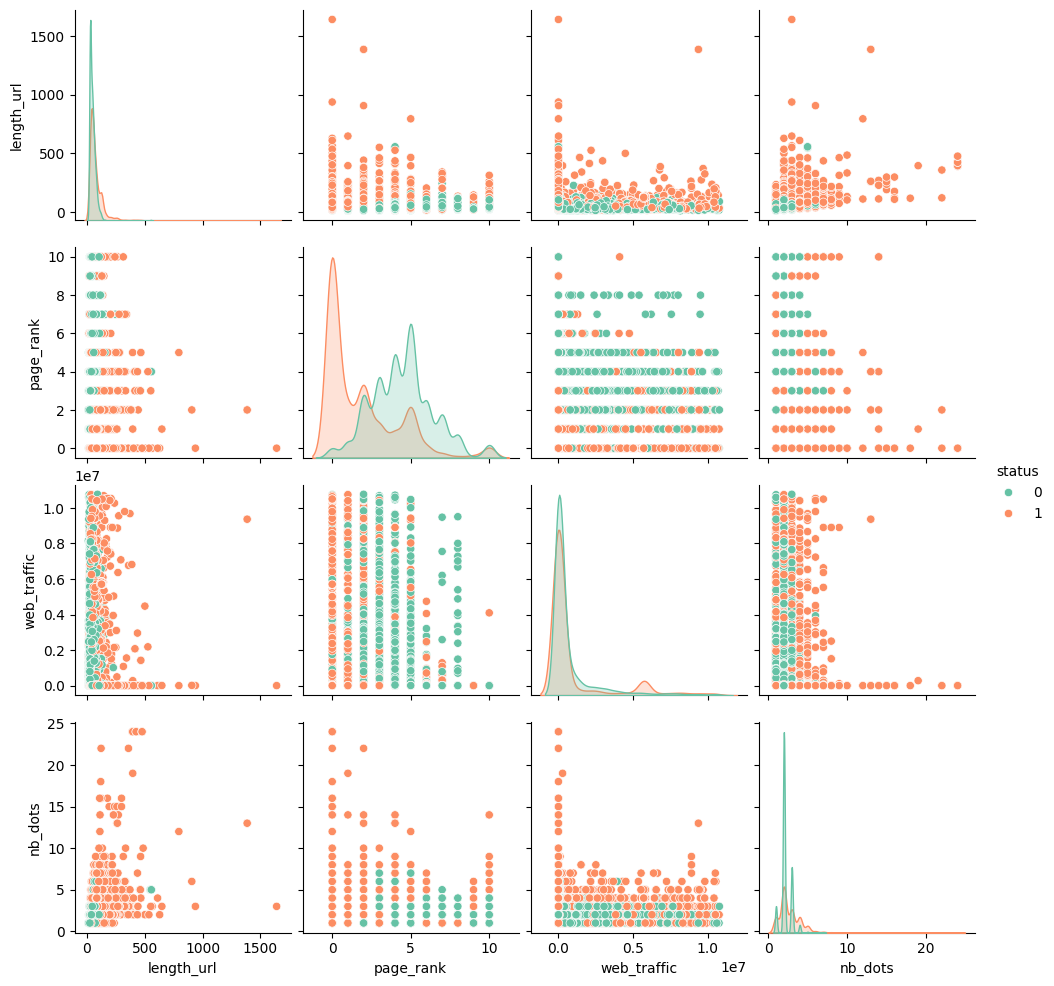

In [ ]:
selected_features = ['length_url', 'page_rank', 'web_traffic', 'nb_dots', 'status']
sns.pairplot(dataset[selected_features], hue='status', palette='Set2')
plt.show()

# Model Training


## Split Dataset into Features (X) and Target (y)

In [ ]:
X = dataset.drop('status', axis=1)  # Features
y = dataset['status']  # Target variable

## Splits

In [ ]:
splits = {
    '80-20 Split': train_test_split(X, y, test_size=0.2, random_state=42),
    '70-30 Split': train_test_split(X, y, test_size=0.3, random_state=42),
    '60-40 Split': train_test_split(X, y, test_size=0.4, random_state=42)
}

## Hyper

In [ ]:
def hyperparameter_tuning(X_train, X_test, y_train, y_test):
    results = {}

    # Logistic Regression with reduced parameter grid
    param_grid_lr = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear']}
    log_reg = LogisticRegression(max_iter=1000)
    random_search_lr = RandomizedSearchCV(log_reg, param_distributions=param_grid_lr, n_iter=3, cv=2, n_jobs=-1)
    random_search_lr.fit(X_train, y_train)

    y_pred_lr = random_search_lr.predict(X_test)
    y_prob_lr = random_search_lr.predict_proba(X_test)[:, 1]
    cm_lr = confusion_matrix(y_test, y_pred_lr)

    results['Logistic Regression'] = {
        'Accuracy': accuracy_score(y_test, y_pred_lr),
        'Precision': precision_score(y_test, y_pred_lr),
        'Recall': recall_score(y_test, y_pred_lr),
        'F1 Score': f1_score(y_test, y_pred_lr),
        'AUC': roc_auc_score(y_test, y_prob_lr),
        'Confusion Matrix': cm_lr
    }

    # SVM with reduced parameter grid
    param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1]}
    svm = SVC(probability=True)
    random_search_svm = RandomizedSearchCV(svm, param_distributions=param_grid_svm, n_iter=3, cv=2, n_jobs=-1)
    random_search_svm.fit(X_train, y_train)

    y_pred_svm = random_search_svm.predict(X_test)
    y_prob_svm = random_search_svm.predict_proba(X_test)[:, 1]
    cm_svm = confusion_matrix(y_test, y_pred_svm)

    results['SVM'] = {
        'Accuracy': accuracy_score(y_test, y_pred_svm),
        'Precision': precision_score(y_test, y_pred_svm),
        'Recall': recall_score(y_test, y_pred_svm),
        'F1 Score': f1_score(y_test, y_pred_svm),
        'AUC': roc_auc_score(y_test, y_prob_svm),
        'Confusion Matrix': cm_svm
    }

    # Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_test)
    y_prob_rf = rf.predict_proba(X_test)[:, 1]
    cm_rf = confusion_matrix(y_test, y_pred_rf)

    results['Random Forest'] = {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'Precision': precision_score(y_test, y_pred_rf),
        'Recall': recall_score(y_test, y_pred_rf),
        'F1 Score': f1_score(y_test, y_pred_rf),
        'AUC': roc_auc_score(y_test, y_prob_rf),
        'Confusion Matrix': cm_rf
    }

    return results

## Feature Selection with RFE

In [ ]:
def select_important_features(X_train, X_test, y_train, feature_names, n_features=50):
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)

    # Use RFE to select the top n_features
    rfe = RFE(rf, n_features_to_select=n_features)
    X_train_selected = rfe.fit_transform(X_train, y_train)
    X_test_selected = rfe.transform(X_test)

    # Get selected feature names
    selected_feature_names = feature_names[rfe.get_support()]

    return X_train_selected, X_test_selected, selected_feature_names

## Visualization for Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, model_name, split_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name} - {split_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## Loop through each splits and results

Results for 80-20 Split:
Selected Features for 80-20 Split: Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_qm',
       'nb_eq', 'nb_underscore', 'nb_percent', 'nb_slash', 'nb_space',
       'nb_www', 'https_token', 'ratio_digits_url', 'ratio_digits_host',
       'nb_subdomains', 'prefix_suffix', 'shortening_service',
       'nb_redirection', 'length_words_raw', 'char_repeat',
       'shortest_words_raw', 'shortest_word_host', 'shortest_word_path',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_path', 'phish_hints', 'domain_in_brand', 'nb_hyperlinks',
       'ratio_intHyperlinks', 'ratio_extHyperlinks', 'nb_extCSS',
       'ratio_extRedirection', 'ratio_extErrors', 'external_favicon',
       'links_in_tags', 'ratio_intMedia', 'ratio_extMedia', 'safe_anchor',
       'empty_title', 'domain_in_title', 'domain_with_copyright',
       'domain_registration_length', 'domain_age', 'web_traffic', 'dns_record',
       'google_index',

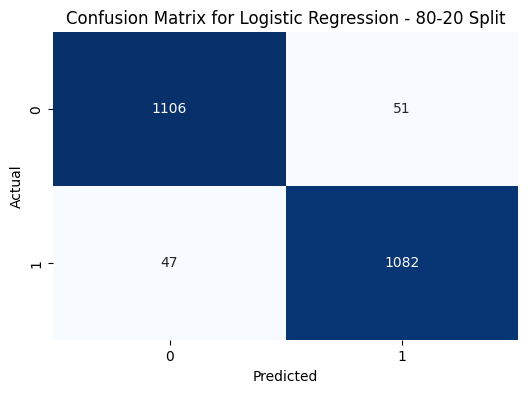


SVM:
Accuracy: 0.9558
Precision: 0.9533
Recall: 0.9575
F1 Score: 0.9554
AUC: 0.9890
Confusion Matrix:
[[1104   53]
 [  48 1081]]


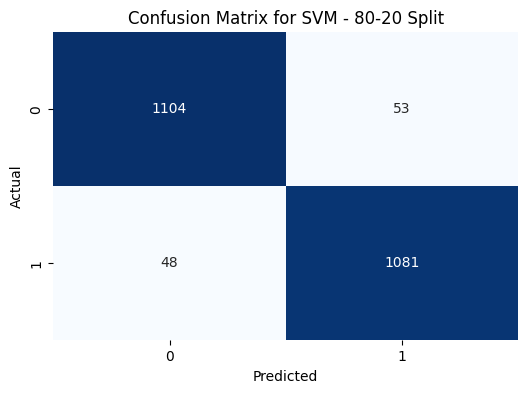


Random Forest:
Accuracy: 0.9672
Precision: 0.9680
Recall: 0.9655
F1 Score: 0.9667
AUC: 0.9954
Confusion Matrix:
[[1121   36]
 [  39 1090]]


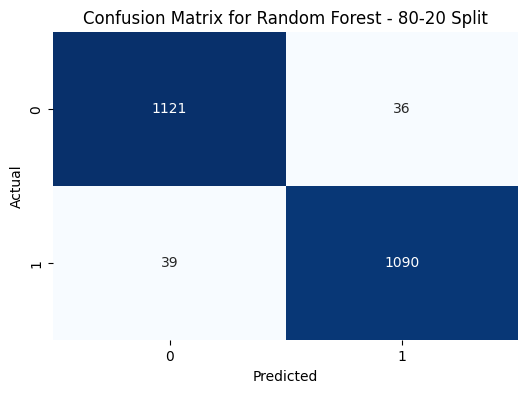



Results for 70-30 Split:
Selected Features for 70-30 Split: Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_qm',
       'nb_eq', 'nb_underscore', 'nb_percent', 'nb_slash', 'nb_space',
       'nb_www', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'nb_subdomains', 'prefix_suffix',
       'shortening_service', 'nb_redirection', 'length_words_raw',
       'char_repeat', 'shortest_words_raw', 'shortest_word_host',
       'shortest_word_path', 'longest_word_host', 'longest_word_path',
       'avg_words_raw', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks',
       'nb_extCSS', 'ratio_extRedirection', 'ratio_extErrors',
       'external_favicon', 'links_in_tags', 'ratio_intMedia', 'ratio_extMedia',
       'safe_anchor', 'empty_title', 'domain_in_title',
       'domain_with_copyright', 'domain_registration_length', 'domain_age',
       'web_traffic', 'google_ind

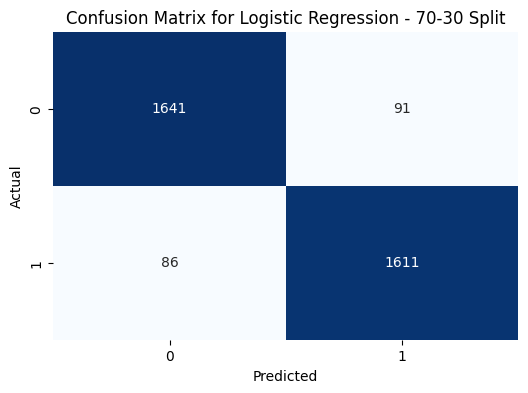


SVM:
Accuracy: 0.9481
Precision: 0.9455
Recall: 0.9499
F1 Score: 0.9477
AUC: 0.9862
Confusion Matrix:
[[1639   93]
 [  85 1612]]


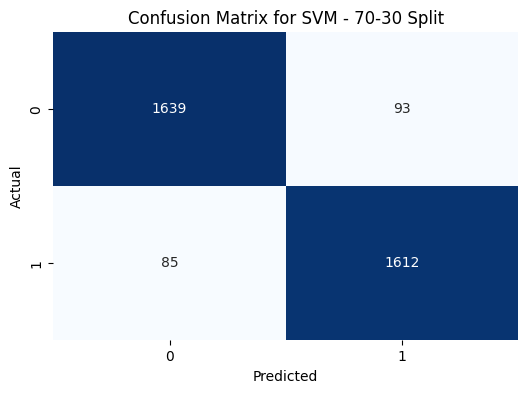


Random Forest:
Accuracy: 0.9673
Precision: 0.9676
Recall: 0.9664
F1 Score: 0.9670
AUC: 0.9949
Confusion Matrix:
[[1677   55]
 [  57 1640]]


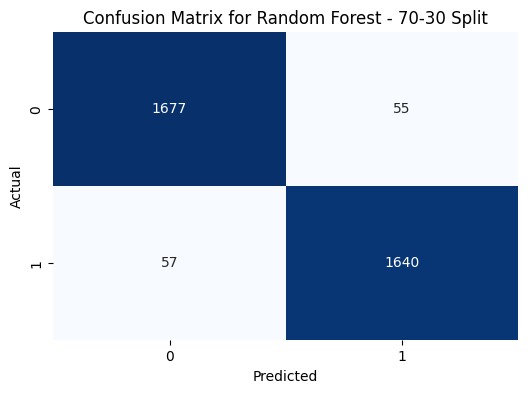



Results for 60-40 Split:
Selected Features for 60-40 Split: Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_qm',
       'nb_eq', 'nb_underscore', 'nb_percent', 'nb_slash', 'nb_www',
       'https_token', 'ratio_digits_url', 'ratio_digits_host', 'nb_subdomains',
       'prefix_suffix', 'shortening_service', 'nb_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_word_host',
       'longest_word_path', 'avg_words_raw', 'avg_word_path', 'phish_hints',
       'domain_in_brand', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'nb_extCSS', 'ratio_extRedirection',
       'ratio_extErrors', 'external_favicon', 'links_in_tags',
       'ratio_intMedia', 'ratio_extMedia', 'safe_anchor', 'empty_title',
       'domain_in_title', 'domain_with_copyright', 'whois_registered_domain',
       'domain_registration_length', 'domain_age', 'web_traffic', 'dns_record',
     

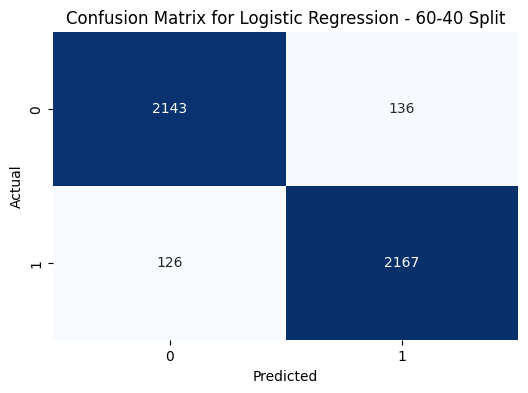


SVM:
Accuracy: 0.9453
Precision: 0.9420
Recall: 0.9494
F1 Score: 0.9457
AUC: 0.9847
Confusion Matrix:
[[2145  134]
 [ 116 2177]]


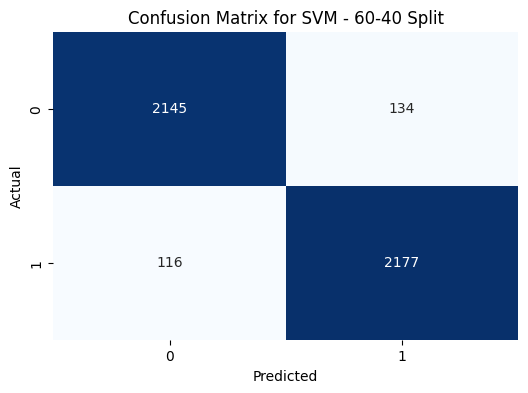


Random Forest:
Accuracy: 0.9643
Precision: 0.9634
Recall: 0.9655
F1 Score: 0.9645
AUC: 0.9943
Confusion Matrix:
[[2195   84]
 [  79 2214]]


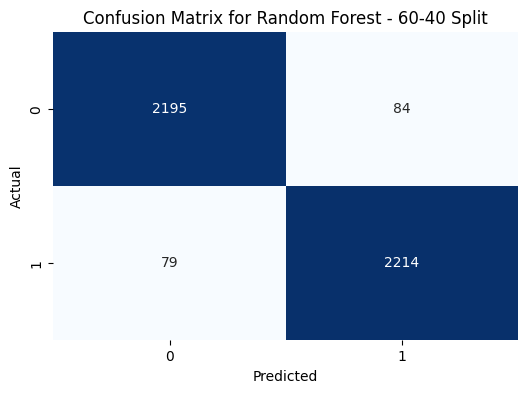

In [ ]:
for split_name, (X_train, X_test, y_train, y_test) in splits.items():
    print(f"Results for {split_name}:")

    # Get feature names (assuming your dataset is a pandas DataFrame)
    feature_names = X_train.columns  # Modify if your data is not in DataFrame format

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Select important features from Random Forest (select 50 features)
    X_train_selected, X_test_selected, selected_features = select_important_features(X_train_scaled, X_test_scaled, y_train, feature_names, n_features=50)

    # Print selected features
    print(f"Selected Features for {split_name}: {selected_features}")

    # Perform hyperparameter tuning on the selected features
    results = hyperparameter_tuning(X_train_selected, X_test_selected, y_train, y_test)

    # Print the results
    for model_name, metrics in results.items():
        print(f"\n{model_name}:")
        for metric_name, value in metrics.items():
            if metric_name == 'Confusion Matrix':
                print(f"{metric_name}:\n{value}")  # Print confusion matrix
                # Plot confusion matrix
                plot_confusion_matrix(value, model_name, split_name)
            else:
                print(f"{metric_name}: {value:.4f}")
    print("\n" + "="*50 + "\n")